In [1]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
from sklearn import datasets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas.util.testing as tm
from sklearn.preprocessing import normalize #machine learning algorithm library

Using TensorFlow backend.


In [18]:
#Reading data 
data=pd.read_csv(r"C:\\Users\\Aditi khandelwal\\Downloads\\iris.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

Describing the data:         sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Info of the data: None


In [19]:
print("10 first samples of the dataset:",data.head(10))
print("10 last samples of the dataset:",data.tail(10))

10 first samples of the dataset:    sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa
10 last samples of the dataset:      sepal.length  sepal.width  petal.length  petal.width    variety
140           6.7          3.1           5.6          2.4  Virginica
141           6.9          3.1           5.1          2.3  Virginica
142           5.8       

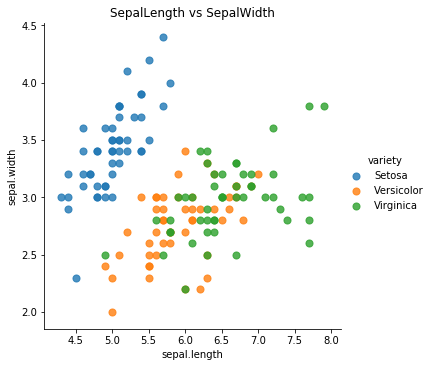

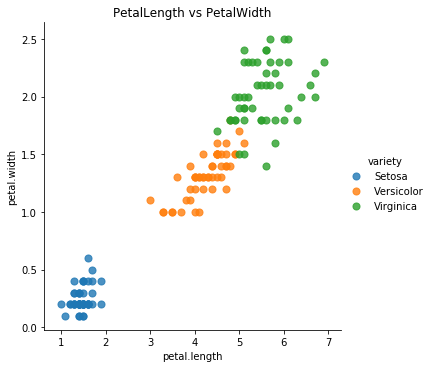

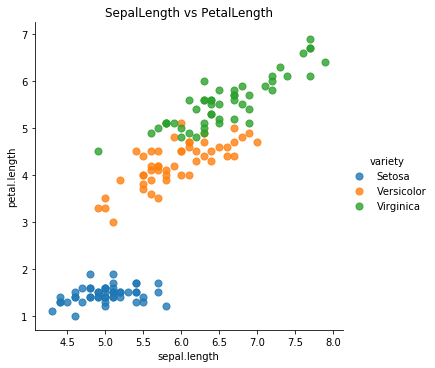

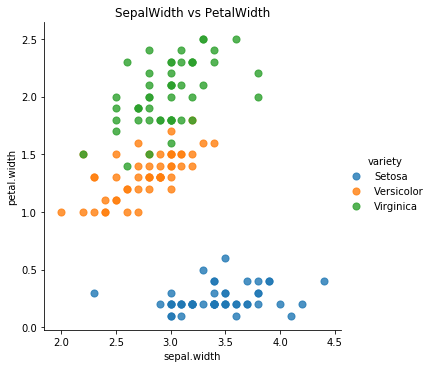

In [27]:
#Visualisation of the dataset
sns.lmplot('sepal.length', 'sepal.width',
           data=data,
           fit_reg=False,
           hue="variety",
           scatter_kws={"marker": "D","s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('petal.length', 'petal.width',
           data=data,
           fit_reg=False,
           hue="variety",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('sepal.length', 'petal.length',
           data=data,
           fit_reg=False,
           hue="variety",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('sepal.width', 'petal.width',
           data=data,
           fit_reg=False,
           hue="variety",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [28]:
print(data["variety"].unique())

['Setosa' 'Versicolor' 'Virginica']


In [45]:
data.loc[data["variety"]=="Setosa","Species"]=0
data.loc[data["variety"]=="Versicolor","Species"]=1
data.loc[data["variety"]=="Virginica","Species"]=2
data.drop(['variety'], axis=1)
del data['variety']
print(data.head())

     sepal.length  sepal.width  petal.length  petal.width  Species
130           7.4          2.8           6.1          1.9      2.0
138           6.0          3.0           4.8          1.8      2.0
149           5.9          3.0           5.1          1.8      2.0
57            4.9          2.4           3.3          1.0      1.0
23            5.1          3.3           1.7          0.5      0.0


In [50]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

     sepal.length  sepal.width  petal.length  petal.width  Species
76            6.8          2.8           4.8          1.4      1.0
33            5.5          4.2           1.4          0.2      0.0
148           6.2          3.4           5.4          2.3      2.0
107           7.3          2.9           6.3          1.8      2.0
8             4.4          2.9           1.4          0.2      0.0


In [51]:
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[6.8 2.8 4.8 1.4]
 [5.5 4.2 1.4 0.2]
 [6.2 3.4 5.4 2.3]]
Examples of y
 [1. 0. 2.]


In [52]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.09408352 0.07403367 0.09445032 0.08051697]
 [0.07609697 0.11105051 0.02754801 0.01150242]
 [0.08578203 0.08989803 0.10625661 0.13227788]]


In [53]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [54]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [55]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [56]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 1s 6ms/step - loss: 1.0778 - accuracy: 0.6083 - val_loss: 1.0636 - val_accuracy: 0.5333
Epoch 2/10
120/120 [==============================] - 0s 557us/step - loss: 1.0072 - accuracy: 0.6917 - val_loss: 0.9935 - val_accuracy: 0.5333
Epoch 3/10
120/120 [==============================] - 0s 573us/step - loss: 0.8545 - accuracy: 0.7000 - val_loss: 0.8537 - val_accuracy: 0.5333
Epoch 4/10
120/120 [==============================] - 0s 557us/step - loss: 0.6535 - accuracy: 0.7083 - val_loss: 0.6652 - val_accuracy: 0.7667
Epoch 5/10
120/120 [==============================] - 0s 798us/step - loss: 0.4867 - accuracy: 0.7750 - val_loss: 0.4636 - val_accuracy: 0.9000
Epoch 6/10
120/120 [==============================] - 0s 798us/step - loss: 0.3392 - accuracy: 0.9583 - val_loss: 0.3637 - val_accuracy: 0.9000
Epoch 7/10
120/120 [==============================] - 0s 798us/step - loss: 0.2427 - accuracy

In [59]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 90.0
